# Deep Learning Project - Group 6
Bruna Faria | 20211529; 
Catarina Oliveira | 20211616;
Inês Vieira | 20211589;
Joana Rosa | 20211516;
Rita Centeno | 20211579


## **Metadata and Functional API**

#### Table of Contents:
1. [Library Imports](#libraries-imports)
2. [Data Importation](#data-importation)
3. [Tabular Data](#tabular-data)
4. [Feature Engineering](#feature-eng)
5. [Metadata Model Creation](#meta-modeling)
6. [Functional API](#functional-api)

### Imports
<a id='libraries-imports'></a>

In [1]:
# Imports

# Importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Importing scikit-learn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.impute import KNNImputer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

# Importing tensorflow libraries
from tensorflow.keras.models import load_model, Model
from tensorflow.keras import layers, Input

# Importing keras libraries and packages
# !pip install keras-tuner
import keras_tuner as kt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers

# Importing imblearn libraries
from imblearn.over_sampling import RandomOverSampler

# Import warnings to silence warnings
import warnings
warnings.filterwarnings("ignore")

# Importing custom functions
from path import path
from utils import *

%load_ext autoreload
%autoreload 2

### Data Importation
<a id='data-importation'></a>

The following cells contain the final data which was exported from the modelling notebook and are kept in a separate folder. They were then imported into this one so that the preprocessing and modelling stages would be easier.

In [2]:
# Data Imports

# Importing dataframes
metadata_train = pd.read_csv(path + "new_data//metadata_train_over.csv")
metadata_val = pd.read_csv(path + "new_data//metadata_val.csv")
metadata_test = pd.read_csv(path + "new_data//test_metadata.csv")

# Importing numpy arrays
X_test = np.load(path + "new_data//X_test.npy")
X_train_over = np.load(path + "new_data//X_train_over.npy")
X_val = np.load(path + "new_data//X_val.npy")
y_test = np.load(path + "new_data//y_test.npy")
y_train_over = np.load(path + "new_data//y_train_over.npy")
y_val = np.load(path + "new_data//y_val.npy")

### Tabular Data
<a id='tabular-data'></a>

In [3]:
print('---------TRAIN---------\n')
print(metadata_train.isnull().sum())

print('\n----------VAL----------\n')
print(metadata_val.isnull().sum())

print('\n----------TEST----------\n')
print(metadata_test.isnull().sum())

---------TRAIN---------

lesion_id                0
image_id                 0
dx                       0
dx_type                  0
age                     57
sex                      0
localization             0
original_index           0
original_train_index     0
dtype: int64

----------VAL----------

lesion_id               0
image_id                0
dx                      0
dx_type                 0
age                     8
sex                     0
localization            0
original_index          0
original_train_index    0
dtype: int64

----------TEST----------

lesion_id               0
image_id                0
dx                      0
dx_type                 0
age                    13
sex                     0
localization            0
original_index          0
original_test_index     0
dtype: int64


### Feature Engineering and Encoding of Features
<a id='feature-eng'></a>

Warning: It is important to keep in mind that metadata_train is now the correspondent to the metadata_train_over from the other notebook

In [61]:
# Creating a copy of the dataframes
metadata_train_df = metadata_train.copy()
metadata_val_df = metadata_val.copy()
metadata_test_df = metadata_test.copy()

# Dropping the columns that do not need to be preprocessed
metadata_train_df = metadata_train_df.drop(['lesion_id', 'image_id', 'original_index', 'original_train_index'], axis = 1)
metadata_val_df = metadata_val_df.drop(['lesion_id', 'image_id','original_index', 'original_train_index'], axis = 1)
metadata_test_df = metadata_test_df.drop(['lesion_id', 'image_id', 'original_index', 'original_test_index'], axis = 1)

In [62]:
# Checking counts for the dx_type column
print("----metetadata_train----")
print(metadata_train_df.dx_type.value_counts())

print("\n-----metadata_val-----")
print(metadata_val_df.dx_type.value_counts())

print("\n-----metadata_test-----")
print(metadata_test_df.dx_type.value_counts())


----metetadata_train----
dx_type
histo        8934
consensus    2771
follow_up    2209
confocal       94
Name: count, dtype: int64

-----metadata_val-----
dx_type
histo        787
follow_up    566
consensus    146
confocal       4
Name: count, dtype: int64

-----metadata_test-----
dx_type
histo        1326
follow_up     929
consensus     229
confocal       20
Name: count, dtype: int64


In [63]:
# Checking counts for the localization column
print("----metetadata_train----")
print(metadata_train_df.localization.value_counts())

print("\n-----metadata_val-----")
print(metadata_val_df.localization.value_counts())

print("\n-----metadata_test-----")
print(metadata_test_df.localization.value_counts())

----metetadata_train----
localization
lower extremity    3505
back               2637
upper extremity    1856
face               1687
trunk              1314
abdomen            1173
chest               593
neck                309
scalp               272
foot                207
unknown             198
hand                158
ear                  66
genital              30
acral                 3
Name: count, dtype: int64

-----metadata_val-----
localization
back               326
lower extremity    320
trunk              223
upper extremity    168
abdomen            163
face               105
chest               57
foot                41
unknown             34
neck                22
scalp               17
hand                13
genital              7
ear                  7
Name: count, dtype: int64

-----metadata_test-----
localization
back               558
lower extremity    519
trunk              358
upper extremity    267
abdomen            242
face               182
chest          

In [64]:
# Checking counts for the sex column
print("----metetadata_train----")
print(metadata_train_df.sex.value_counts())

print("\n-----metadata_val-----")
print(metadata_val_df.sex.value_counts())

print("\n-----metadata_test-----")
print(metadata_test_df.sex.value_counts())

----metetadata_train----
sex
male       7915
female     6039
unknown      54
Name: count, dtype: int64

-----metadata_val-----
sex
male       833
female     663
unknown      7
Name: count, dtype: int64

-----metadata_test-----
sex
male       1354
female     1137
unknown      13
Name: count, dtype: int64


In [65]:
# Encoding the sex column
sex_mapping = {'female': 0, 'male': 2, 'unknown': 1}
metadata_train_df['sex'] = metadata_train_df['sex'].map(sex_mapping)
metadata_val_df['sex'] = metadata_val_df['sex'].map(sex_mapping)
metadata_test_df['sex'] = metadata_test_df['sex'].map(sex_mapping)

# Encoding the localization column
# localization ordered from head to toe
localization_mapping = {'unknown': 0, 'face': 1, 'scalp': 2, 'ear': 3, 'neck': 4, 'chest': 5, 'trunk': 6, 'abdomen': 7, 'back':8, 'genital': 9, 'hand': 10, 
                        'upper extremity': 11, 'lower extremity': 12, 'foot': 13 }

metadata_train_df['localization'] = metadata_train_df['localization'].map(localization_mapping)
metadata_val_df['localization'] = metadata_val_df['localization'].map(localization_mapping)
metadata_test_df['localization'] = metadata_test_df['localization'].map(localization_mapping)

In [66]:
# Checking counts for the dx_type column
print("----metetadata_train----")
print(metadata_test_df.dx_type.value_counts())

print("\n-----metadata_val-----")
print(metadata_val_df.dx_type.value_counts())

print("\n-----metadata_test-----")
print(metadata_train_df.dx_type.value_counts())

----metetadata_train----
dx_type
histo        1326
follow_up     929
consensus     229
confocal       20
Name: count, dtype: int64

-----metadata_val-----
dx_type
histo        787
follow_up    566
consensus    146
confocal       4
Name: count, dtype: int64

-----metadata_test-----
dx_type
histo        8934
consensus    2771
follow_up    2209
confocal       94
Name: count, dtype: int64


In [67]:
print("\n---metadata_train---")
print(metadata_train.dx.value_counts())

print("\n---metadata_val---")
print(metadata_val.dx.value_counts())

print("\n---metadata_test---")
print(metadata_test.dx.value_counts())


---metadata_train---
dx
nv       3508
akiec    1750
mel      1750
bkl      1750
bcc      1750
df       1750
vasc     1750
Name: count, dtype: int64

---metadata_val---
dx
nv       1006
mel       167
bkl       165
bcc        77
akiec      49
vasc       22
df         17
Name: count, dtype: int64

---metadata_test---
dx
nv       1676
mel       278
bkl       275
bcc       129
akiec      82
vasc       35
df         29
Name: count, dtype: int64


In [68]:
# Replacing age missing values with 0
metadata_train_df['age'].replace(np.nan, 0, inplace=True)
metadata_val_df['age'].replace(np.nan, 0, inplace=True)
metadata_test_df['age'].replace(np.nan, 0, inplace=True)

In [69]:
metadata_train_df.age.value_counts()

age
55.0    1550
50.0    1438
70.0    1417
65.0    1366
45.0    1346
60.0    1277
75.0    1144
40.0     967
80.0     899
35.0     770
85.0     649
30.0     473
25.0     212
20.0     147
0.0      128
5.0       95
15.0      85
10.0      45
Name: count, dtype: int64

In [70]:
metadata_train_df.head(3)

,dx,dx_type,age,sex,localization
0,nv,histo,75.0,0,8.0
1,nv,follow_up,65.0,2,8.0
2,nv,histo,45.0,0,8.0


In [71]:
# Scaling the numeric columns
scaler = MinMaxScaler()
metadata_train_df.iloc[:,2:] = scaler.fit_transform(metadata_train_df.iloc[:,2:])
metadata_val_df.iloc[:,2:] = scaler.transform(metadata_val_df.iloc[:,2:])
metadata_test_df.iloc[:,2:] = scaler.transform(metadata_test_df.iloc[:,2:])

# Checking the results
metadata_test_df.head(3)

,dx,dx_type,age,sex,localization
0,bkl,histo,0.823529,0.0,0.615385
1,bkl,histo,1.000000,0.0,0.384615
2,bkl,histo,0.823529,0.0,0.076923


In [72]:
# One-hot encode the dx_type column
ct = ColumnTransformer([('one_hot', OneHotEncoder(), [1] )], remainder = "passthrough")
metadata_train_df_dxtype= ct.fit_transform(metadata_train_df)
metadata_val_df_dxtype= ct.transform(metadata_val_df)
metadata_test_df_dxtype= ct.transform(metadata_test_df)

In [73]:
# Get the feature names after transformations
feature_names = ct.get_feature_names_out(metadata_train_df.columns)

# Create dataframes with the transformed data
metadata_train_df_dxtype = pd.DataFrame(metadata_train_df_dxtype, columns=feature_names)
metadata_val_df_dxtype = pd.DataFrame(metadata_val_df_dxtype, columns=feature_names)
metadata_test_df_dxtype = pd.DataFrame(metadata_test_df_dxtype, columns=feature_names)

In [74]:
metadata_train_df_dxtype.head(3)

,one_hot__dx_type_confocal,one_hot__dx_type_consensus,one_hot__dx_type_follow_up,one_hot__dx_type_histo,remainder__dx,remainder__age,remainder__sex,remainder__localization
0,0.0,0.0,0.0,1.0,nv,0.882353,0.0,0.615385
1,0.0,0.0,1.0,0.0,nv,0.764706,1.0,0.615385
2,0.0,0.0,0.0,1.0,nv,0.529412,0.0,0.615385


In [75]:
# Renaming the created 'remainder' columns

# TRAIN
metadata_train_df_dxtype['dx'] = metadata_train_df_dxtype['remainder__dx']
metadata_train_df_dxtype['age'] = metadata_train_df_dxtype['remainder__age']
metadata_train_df_dxtype['sex'] = metadata_train_df_dxtype['remainder__sex']
metadata_train_df_dxtype['localization'] = metadata_train_df_dxtype['remainder__localization']

metadata_train_df_dxtype.drop(columns=[ 'remainder__dx','remainder__age', 'remainder__sex', 'remainder__localization'], axis=1, inplace=True)

# VAL
metadata_val_df_dxtype['dx'] = metadata_val_df_dxtype['remainder__dx']
metadata_val_df_dxtype['age'] = metadata_val_df_dxtype['remainder__age']
metadata_val_df_dxtype['sex'] = metadata_val_df_dxtype['remainder__sex']
metadata_val_df_dxtype['localization'] = metadata_val_df_dxtype['remainder__localization']

metadata_val_df_dxtype.drop(columns=['remainder__dx','remainder__age', 'remainder__sex', 'remainder__localization'], axis=1, inplace=True)

# TEST
metadata_test_df_dxtype['dx'] = metadata_test_df_dxtype['remainder__dx']
metadata_test_df_dxtype['age'] = metadata_test_df_dxtype['remainder__age']
metadata_test_df_dxtype['sex'] = metadata_test_df_dxtype['remainder__sex']
metadata_test_df_dxtype['localization'] = metadata_test_df_dxtype['remainder__localization']

metadata_test_df_dxtype.drop(columns=['remainder__dx', 'remainder__age', 'remainder__sex', 'remainder__localization'], axis=1, inplace=True)

In [77]:
# Encoding the target column
label_encoder = LabelEncoder()

metadata_train_df_dxtype['dx'] = label_encoder.fit_transform(metadata_train_df_dxtype['dx'])
metadata_val_df_dxtype['dx'] = label_encoder.transform(metadata_val_df_dxtype['dx'])
metadata_test_df_dxtype['dx'] = label_encoder.transform(metadata_test_df_dxtype['dx'])

# Check the encoding correspondance
label_mapping = {i: label for i, label in enumerate(label_encoder.classes_)}
print(', '.join(f'{encoded}: {original}' for encoded, original in label_mapping.items()))

0: akiec, 1: bcc, 2: bkl, 3: df, 4: mel, 5: nv, 6: vasc


In [78]:
# Creating a copy of the dataframes
metadata_train_na = metadata_train_df_dxtype.copy() 
metadata_val_na = metadata_val_df_dxtype.copy() 
metadata_test_na = metadata_test_df_dxtype.copy() 

In [79]:
# Making the missing values explicit

# TRAIN
metadata_train_na.localization.replace(0, pd.NA, inplace=True) 
metadata_train_na.sex.replace(0.5, pd.NA, inplace=True) 
metadata_train_na.age.replace(0, pd.NA, inplace=True) 

# VAL
metadata_val_na.localization.replace(0, pd.NA, inplace=True) 
metadata_val_na.sex.replace(0.5, pd.NA, inplace=True) 
metadata_val_na.age.replace(0, pd.NA, inplace=True) 

# TEST
metadata_test_na.localization.replace(0, pd.NA, inplace=True) 
metadata_test_na.sex.replace(0.5, pd.NA, inplace=True) 
metadata_test_na.age.replace(0, pd.NA, inplace=True) 

In [80]:
# Converting into numeric values

# TRAIN
metadata_train_na['age'] = pd.to_numeric(metadata_train_na['age'], errors='coerce')
metadata_train_na['sex'] = pd.to_numeric(metadata_train_na['sex'], errors='coerce')
metadata_train_na['localization'] = pd.to_numeric(metadata_train_na['localization'], errors='coerce')

# VAL
metadata_val_na['age'] = pd.to_numeric(metadata_val_na['age'], errors='coerce')
metadata_val_na['sex'] = pd.to_numeric(metadata_val_na['sex'], errors='coerce')
metadata_val_na['localization'] = pd.to_numeric(metadata_val_na['localization'], errors='coerce')

# TEST
metadata_test_na['age'] = pd.to_numeric(metadata_test_na['age'], errors='coerce')
metadata_test_na['sex'] = pd.to_numeric(metadata_test_na['sex'], errors='coerce')
metadata_test_na['localization'] = pd.to_numeric(metadata_test_na['localization'], errors='coerce')

In [82]:
metadata_train_na.isna().sum()

one_hot__dx_type_confocal       0
one_hot__dx_type_consensus      0
one_hot__dx_type_follow_up      0
one_hot__dx_type_histo          0
dx                              0
age                           128
sex                            54
localization                  201
dtype: int64

In [83]:
# Imputing the missing values with KNNImputer
imputer = KNNImputer(n_neighbors = 3)
metadata_train_imputed = imputer.fit_transform(metadata_train_na)
metadata_val_imputed = imputer.transform(metadata_val_na)
metadata_test_imputed = imputer.transform(metadata_test_na)

In [86]:
# Creating dataframes with the imputed data
metadata_train = pd.DataFrame(metadata_train_imputed, columns=metadata_train_na.columns)
metadata_val = pd.DataFrame(metadata_val_imputed, columns=metadata_val_na.columns)
metadata_test = pd.DataFrame(metadata_test_imputed, columns=metadata_test_na.columns)

In [88]:
metadata_train.isna().sum()

one_hot__dx_type_confocal     0
one_hot__dx_type_consensus    0
one_hot__dx_type_follow_up    0
one_hot__dx_type_histo        0
dx                            0
age                           0
sex                           0
localization                  0
dtype: int64

In [89]:
# Separating data and target
y_train_meta = metadata_train.iloc[:, 4]
X_train_meta = metadata_train.iloc[:, :4].join(metadata_train.iloc[:, 5:])

y_val_meta = metadata_val.iloc[:, 4]
X_val_meta = metadata_val.iloc[:, :4].join(metadata_val.iloc[:, 5:])

y_test_meta = metadata_test.iloc[:, 4]
X_test_meta = metadata_test.iloc[:, :4].join(metadata_test.iloc[:, 5:])

In [90]:
X_train_meta

,one_hot__dx_type_confocal,one_hot__dx_type_consensus,one_hot__dx_type_follow_up,one_hot__dx_type_histo,age,sex,localization
0,0.0,0.0,0.0,1.0,0.882353,0.0,0.615385
1,0.0,0.0,1.0,0.0,0.764706,1.0,0.615385
2,0.0,0.0,0.0,1.0,0.529412,0.0,0.615385
3,0.0,0.0,0.0,1.0,0.764706,0.0,0.076923
4,0.0,0.0,0.0,1.0,0.470588,1.0,0.923077
...,...,...,...,...,...,...,...
14003,0.0,1.0,0.0,0.0,0.823529,0.0,0.615385
14004,0.0,0.0,0.0,1.0,0.176471,1.0,0.076923
14005,0.0,1.0,0.0,0.0,0.411765,1.0,0.461538
14006,0.0,0.0,0.0,1.0,0.235294,1.0,0.846154


In [91]:
# Converting data into tensors
X_train_meta = tf.convert_to_tensor(X_train_meta, dtype=tf.float32)
y_train_meta = tf.convert_to_tensor(y_train_meta, dtype=tf.float32)
X_val_meta = tf.convert_to_tensor(X_val_meta, dtype=tf.float32)
y_val_meta = tf.convert_to_tensor(y_val_meta, dtype=tf.float32)
X_test_meta = tf.convert_to_tensor(X_test_meta, dtype=tf.float32)
y_test_meta = tf.convert_to_tensor(y_test_meta, dtype=tf.float32)

### Metadata Modelling
<a id='meta-modeling'></a>

In [ ]:
# Defining callbacks
stop_early = EarlyStopping(monitor = 'val_loss', patience = 3)

In [642]:
# Defining the model
model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu')) # kernel_regularizer=regularizers.L2(0.001))) #complex nn, alpha = [0.001-0.1], for more data between [0.1-0.2]
model.add(Dense(7, activation = 'softmax'))

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fitting the model
history = model.fit(X_train_meta, y_train_meta, validation_data=[X_val_meta,y_val_meta], epochs= 100, batch_size= 300)

Epoch 1/100
47/47 [==============================] - 4s 41ms/step - loss: 1.3954 - accuracy: 0.4210 - val_loss: 1.1589 - val_accuracy: 0.5196
Epoch 2/100
47/47 [==============================] - 2s 37ms/step - loss: 1.2434 - accuracy: 0.4935 - val_loss: 1.0630 - val_accuracy: 0.5536
Epoch 3/100
47/47 [==============================] - 2s 36ms/step - loss: 1.2051 - accuracy: 0.5163 - val_loss: 1.0065 - val_accuracy: 0.5642
Epoch 4/100
47/47 [==============================] - 2s 36ms/step - loss: 1.1846 - accuracy: 0.5233 - val_loss: 1.0071 - val_accuracy: 0.5735
Epoch 5/100
47/47 [==============================] - 2s 39ms/step - loss: 1.1779 - accuracy: 0.5265 - val_loss: 0.9850 - val_accuracy: 0.5855
Epoch 6/100
47/47 [==============================] - 2s 41ms/step - loss: 1.1642 - accuracy: 0.5332 - val_loss: 1.0050 - val_accuracy: 0.5875
Epoch 7/100
47/47 [==============================] - 2s 41ms/step - loss: 1.1568 - accuracy: 0.5351 - val_loss: 0.9485 - val_accuracy: 0.5855
Epoch 

In [ ]:
# Getting the model performance metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

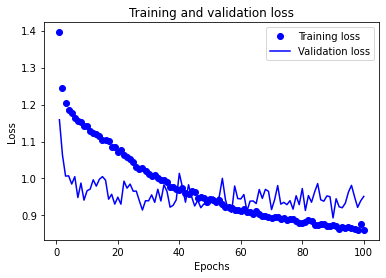

In [644]:
# Plotting the loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

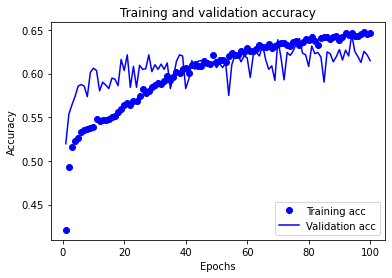

In [645]:
# Plotting the accuracy
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [608]:
# Making predictions
y_train_predicted = model.predict(X_train_meta)
y_train_predicted= np.argmax(y_train_predicted,axis=1)
y_val_predicted= model.predict(X_val_meta)
y_val_predicted= np.argmax(y_val_predicted,axis=1)

47/47 [==============================] - 0s 4ms/step


In [609]:
# Printing model's performance
print(metrics(y_train_meta.numpy(), y_train_predicted, y_val_meta.numpy(), y_val_predicted))

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.46      0.72      0.56      1750
         1.0       0.42      0.51      0.46      1750
         2.0       0.73      0.27      0.40      1750
         3.0       0.64      0.95      0.77      1750
         4.0       0.42      0.19      0.26      1750
         5.0       0.94      0.78      0.85      3508
         6.0       0.71      0.89      0.79      1750

    accuracy                           0.64     14008
   macro avg       0.62      0.62      0.58     14008
weighted avg       0.66      0.64      0.62     14008

0.635850942318675
[[1255  251    9  150   49    0   36]
 [ 394  894   49  142  

In [626]:
# Hyperparameter Tuning
def model_builder(hp):
  '''
  Arguments:
    hp - Keras tuner object
  '''
  hp_units = hp.Choice('units', values = [128, 256, 512])

  model = Sequential()
  model.add(Dense(hp_units,activation="relu"))
  
  hp_dropout = hp.Float('rate', min_value = 0, max_value = 0.3, step = 0.1)
  model.add(Dropout(hp_dropout))

  hp_units2 = hp.Choice('units2', values = [128, 256, 512])
  model.add(Dense(hp_units2, activation='relu'))

  model.add(Dropout(hp_dropout))

  hp_units3 = hp.Choice('units3', values = [64, 128, 256])
  model.add(Dense(hp_units3,activation="relu"))
  model.add(Dropout(hp_dropout))

  hp_units4 = hp.Choice('units4', values = [64, 128, 256])
  model.add(Dense(hp_units4,activation="relu"))
  model.add(Dropout(hp_dropout))

  model.add(Dense(7, activation='softmax'))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
  model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=["sparse_categorical_crossentropy"],
                metrics=['accuracy']
                )
  return model


In [627]:
 # Initiate Hyperparameter Tuner
tuner = kt.Hyperband(model_builder, objective= 'val_accuracy', max_epochs=100, factor=3,
                     directory=path, project_name='hyper_metadata') 

tuner.search(X_train_meta, y_train_meta, validation_data=[X_val_meta,y_val_meta], 
             epochs=95, callbacks=[stop_early])

Trial 254 Complete [00h 00m 57s]
val_accuracy: 0.5815036296844482

Best val_accuracy So Far: 0.6300731897354126
Total elapsed time: 01h 17m 32s


In [635]:
# Best parameters
best_hp=tuner.get_best_hyperparameters()[0]
print(best_hp.values)

# results:
# {'units': 512, 'rate': 0.0, 'units2': 512, 'units3': 64, 'units4': 256, 'learning_rate': 0.001, 'tuner/epochs': 12, 'tuner/initial_epoch': 4, 'tuner/bracket': 3, 'tuner/round': 1, 'tuner/trial_id': '0156'}

{'units': 512, 'rate': 0.0, 'units2': 512, 'units3': 64, 'units4': 256, 'learning_rate': 0.001, 'tuner/epochs': 12, 'tuner/initial_epoch': 4, 'tuner/bracket': 3, 'tuner/round': 1, 'tuner/trial_id': '0156'}


In [ ]:
# Defining the best model
best_model = tuner.hypermodel.build(best_hp)

# Fitting the best model
hist2 = best_model.fit(X_train_meta, y_train_meta, epochs=12, validation_data=[X_val_meta,y_val_meta])

Epoch 1/12
438/438 [==============================] - 8s 19ms/step - loss: 0.8240 - accuracy: 0.6561 - val_loss: 0.9465 - val_accuracy: 0.6261
Epoch 2/12
438/438 [==============================] - 7s 16ms/step - loss: 0.8185 - accuracy: 0.6583 - val_loss: 0.9255 - val_accuracy: 0.6241
Epoch 3/12
438/438 [==============================] - 5s 11ms/step - loss: 0.8150 - accuracy: 0.6583 - val_loss: 0.9275 - val_accuracy: 0.6474
Epoch 4/12
438/438 [==============================] - 4s 9ms/step - loss: 0.8269 - accuracy: 0.6546 - val_loss: 0.9508 - val_accuracy: 0.6347
Epoch 5/12
438/438 [==============================] - 4s 10ms/step - loss: 0.8257 - accuracy: 0.6544 - val_loss: 0.9554 - val_accuracy: 0.6347
Epoch 6/12
438/438 [==============================] - 4s 9ms/step - loss: 0.8275 - accuracy: 0.6518 - val_loss: 0.9473 - val_accuracy: 0.6321
Epoch 7/12
438/438 [==============================] - 4s 10ms/step - loss: 0.8168 - accuracy: 0.6614 - val_loss: 0.9124 - val_accuracy: 0.6494
E

In [631]:
# Making predictions with the best model
y_train_predicted = best_model.predict(X_train_meta)
y_train_predicted= np.argmax(y_train_predicted,axis=1)
y_val_predicted= best_model.predict(X_val_meta)
y_val_predicted= np.argmax(y_val_predicted,axis=1)

47/47 [==============================] - 0s 4ms/step


In [ ]:
# Printing best model's performance
metrics(y_train_meta.numpy(), y_train_predicted, y_val_meta.numpy(), y_val_predicted)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.55      0.63      0.59      1750
         1.0       0.47      0.52      0.50      1750
         2.0       0.66      0.38      0.48      1750
         3.0       0.69      0.93      0.79      1750
         4.0       0.45      0.31      0.36      1750
         5.0       0.92      0.82      0.86      3508
         6.0       0.70      0.95      0.80      1750

    accuracy                           0.67     14008
   macro avg       0.63      0.65      0.63     14008
weighted avg       0.67      0.67      0.66     14008

0.6686893203883495
[[1095  193   78  122  138    0  124]
 [ 268  915   82  130 

In [639]:
# Getting the best model performance metrics
acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

epochs = range(1, len(acc) + 1)

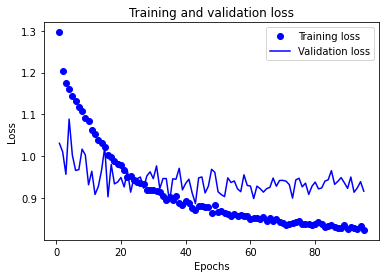

In [640]:
# Plotting the best model's loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

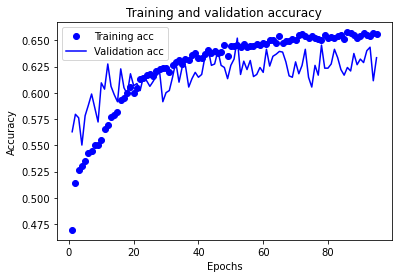

In [641]:
# Plotting the best model's accuracy
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
# Save the best model
# best_model.save(path + 'models//best_model_meta.h5')

### Functional API
<a id='functional-api'></a>

In [94]:
# Loading the best model for images
best_model_images = load_model(path + "models//best_model_images.h5")

# Loading the best model for metadata
best_model_meta = load_model(path + "models//best_model_meta.h5", compile=False)

In [84]:
# Defining the input shapes
images_input = Input(shape = (71, 71 , 3), name = 'images')
metadata_input = Input(shape = (7,), name = 'metadata')

In [85]:
# Defining the functional API
x1 = best_model_images(images_input)
x1 = Flatten()(x1)

x2 = best_model_meta(metadata_input)
x2 = Flatten()(x2)

concatenated = layers.concatenate([x1, x2])
preds = Dense(7, activation='softmax', name='output')(concatenated)

model = Model(inputs=[metadata_input, images_input], outputs=preds)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [90]:
# Defining the tabular features 

# TRAIN
train_tabular_features = metadata_train[['one_hot__dx_type_confocal', 'one_hot__dx_type_consensus', 'one_hot__dx_type_follow_up',
                                          'one_hot__dx_type_histo', 'age', 'sex', 'localization']].values.astype(float)

# VAL
val_tabular_features = metadata_val[['one_hot__dx_type_confocal', 'one_hot__dx_type_consensus', 'one_hot__dx_type_follow_up',
                                          'one_hot__dx_type_histo', 'age', 'sex', 'localization']].values.astype(float)

In [94]:
# Fitting the model
history = model.fit({'images': X_train_over, 'metadata': train_tabular_features}, y=y_train_meta, epochs=10,
    validation_data=({'images': X_val,'metadata': val_tabular_features}, y_val_meta), batch_size=128)

Epoch 1/10
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000265A8E88AF0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000265A8E88AF0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. O

In [121]:
# Storing the functional api model
# model.save(path + "models//functional_API_model.h5")

In [ ]:
# Loading the functional API model
functional_API_model = load_model(path + "models//functional_API_model.h5")

In [111]:
# Predictions on training data
train_pred = model.predict([train_tabular_features, X_train_over], batch_size=64, verbose=1)
train_pred = np.argmax(train_pred, axis=1)

# Predictions on validation data
predictions = model.predict([val_tabular_features, X_val], batch_size=64, verbose=1)
predictions = np.argmax(predictions, axis=1)

metrics(y_train_over, train_pred, y_val, predictions)

24/24 [==============================] - 8s 312ms/step
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.40      0.07      0.12      1750
           1       0.59      0.92      0.72      1750
           2       0.68      0.33      0.45      1750
           3       0.49      0.87      0.63      1750
           4       0.56      0.51      0.53      1750
           5       0.83      0.86      0.84      3508
           6       0.92      0.98      0.95      1750

    accuracy                           0.67     14008
   macro avg       0.64      0.65      0.61     14008
weighted avg       0.66      0.67      0.64     14008

0.6734009137635637
[[ 12